**Simulating a neural network for an XOR Gate**

_Importing Libraries_

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

_Creating a dataset for XOR training. Here,C1 represents first input to XOR and C2 represents second input._

In [244]:
dataset = np.array([[1,1,-1],[1,-1,1],[-1,1,1],[-1,-1,-1]])
for i, item in enumerate(dataset):
    print(i, item)

0 [ 1  1 -1]
1 [ 1 -1  1]
2 [-1  1  1]
3 [-1 -1 -1]


_Dividing the data into training_variables set **_x_** and ouput_variables set **_y_**_

In [245]:
x = dataset[:, 0:2]
y = dataset[:, 2:]

_The datasets x and y look something like this_

In [246]:
for i in range(4):
    print(x[i], y[i])

[1 1] [-1]
[ 1 -1] [1]
[-1  1] [1]
[-1 -1] [-1]


_Defining the sigmoid and sigmoid prime functions which we would be using later in the algorithm_

In [247]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def sigmoid_prime(z):
    return -(np.exp(-z)/np.multiply((1+np.exp(-z)),(1+np.exp(-z))))
    

_An intuition of how these functions behave could be seen from the following curve_

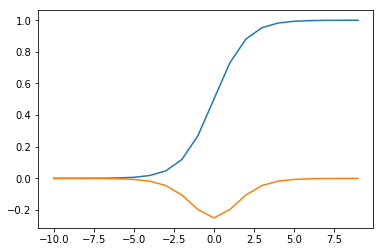

In [248]:
plt.plot(np.array([i for i in range(-10,10)]), sigmoid(np.array([i for i in range(-10, 10)])))
plt.plot(np.array([i for i in range(-10,10)]), sigmoid_prime(np.array([i for i in range(-10,10)])))

**_THE ALGORITHM_**

In [261]:
learning_rate = 1e-2

#Initializing weights
#The first element denotes neurons of lth layer and the second denotes neurons of (l-1)th layer
w1 = np.random.rand(2,2) 
w2 = np.random.rand(1,2) 

#Initializing biases
#It represents the bias for neurons of a given layer
b1 = np.random.rand(2)
b2 = np.random.rand(1)

#d is a list which stores the value of loss function for each updation of wts. and biases
d = []

In [262]:
#from IPython.core.debugger import set_trace
for i in range(300):
    h = (w1.dot(x.T)).T+b1          # h is the weighted sum
    a = sigmoid(h)                  # a is the activation from the weighted sum
    yin = (w2.dot(a.T)).T+b2        # yin is the weighted sum of next layer
    y_pred = sigmoid(yin)           # y_pred is the activation of this layer

    loss = sum(-y*(np.log10(y_pred))-(1-y)*(np.log10(1-y_pred)))*0.25     # We're using cross-entropy loss 
    d.append(loss)
    print(i,loss)

    # Finding gradients and backpropagating it through layers
    grad_yin = (y_pred-y)           # grad_yin is delta_L

    grad_w2 = grad_yin.T.dot(a)     # grad_w2 is the delta_loss/delta_w2
    grad_b2 = grad_yin              # grad_b2 is the delta_loss/delta_b2
    grad_h = (grad_yin.dot(w2))*sigmoid_prime(h)    
    grad_w1 = sum(grad_h*x)
    grad_b1 = sum(grad_h)

    
    # Updating weights
    w1 = w1 - learning_rate * grad_w1
    b1 = b1 - learning_rate * grad_b1
    w2 = w2 - learning_rate * grad_w2
    b2 = b2 - learning_rate * grad_b2


0 [0.78339345]
1 [0.76784117]
2 [0.75238309]
3 [0.73702348]
4 [0.72176653]
5 [0.7066164]
6 [0.69157717]
7 [0.67665282]
8 [0.66184727]
9 [0.64716431]
10 [0.63260761]
11 [0.61818072]
12 [0.60388706]
13 [0.58972987]
14 [0.57571226]
15 [0.56183714]
16 [0.54810725]
17 [0.53452514]
18 [0.52109317]
19 [0.50781348]
20 [0.49468802]
21 [0.48171851]
22 [0.46890647]
23 [0.45625318]
24 [0.44375971]
25 [0.43142691]
26 [0.41925542]
27 [0.40724564]
28 [0.39539778]
29 [0.38371181]
30 [0.37218752]
31 [0.3608245]
32 [0.34962213]
33 [0.33857962]
34 [0.327696]
35 [0.31697014]
36 [0.30640073]
37 [0.29598632]
38 [0.28572534]
39 [0.27561607]
40 [0.26565666]
41 [0.25584518]
42 [0.24617959]
43 [0.23665775]
44 [0.22727745]
45 [0.21803641]
46 [0.20893228]
47 [0.19996268]
48 [0.19112516]
49 [0.18241724]
50 [0.17383644]
51 [0.16538023]
52 [0.15704607]
53 [0.14883143]
54 [0.14073376]
55 [0.13275053]
56 [0.12487921]
57 [0.11711729]
58 [0.10946227]
59 [0.10191169]
60 [0.09446309]
61 [0.08711407]
62 [0.07986224]
63 [0.

_This plot shows the loss function as it decreases with each iteration_

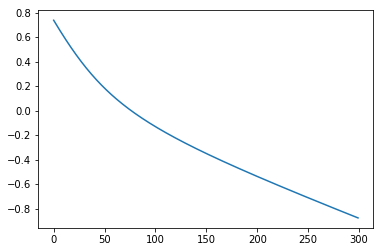

In [252]:
lst = np.array([i for i in range(300)])
plt.plot(lst, d)

_After 10300 iterations_

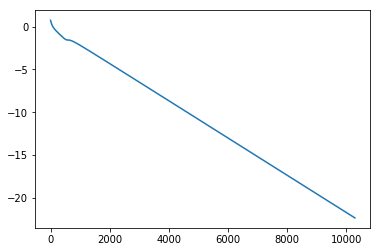

In [258]:
lst = np.array([i for i in range(10300)])
plt.plot(lst, d)

_Predictions on the basis of final weights_

In [263]:
y_pred

array([[0.00249854],
       [0.40152331],
       [0.56252164],
       [0.02933124]])

_Defining a threshold function to get outputs in understandable terms_

In [264]:
def threshold(x):
    res = []  
    for i in x:
        if(i > 0.1):
            res.append(1)
        else:
            res.append(-1)
    return(res)

_Final results of the XOR Gate_

In [265]:
threshold(y_pred)

[-1, 1, 1, -1]